## Linear Regression Using Pyspark

### House Prices

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.



There are 79 variables, the description are:

Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [ ]:

# Download and install Java 8
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Err:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Release
  404  Not Found [IP: 65.8.185.73 443]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRe

In [ ]:
# Download Apache Spark binary: This link can change based on the version. Update this link with the latest version before using
!wget -q https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz


# Unzip file
!tar -xvzf spark-3.1.2-bin-hadoop3.2.tgz

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

In [ ]:
#Install findspark: Adds Pyspark to sys.path at runtime
!pip install -q findspark

# Install pyspark
!pip install pyspark

     |████████████████████████████████| 212.4 MB 69 kB/s 
     |████████████████████████████████| 198 kB 45.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=9314f882f01f029cc2bd62b68f8f1ca04c5030ef2bce034c770fdb3dea994b9b
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
# Add environmental variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

# findspark will locate spark in the system
import findspark
findspark.init()

### Pyspark Initializasing

In [ ]:
# to make pyspark importable as a regular library
import findspark
findspark.init()

import pyspark

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

#initializasing SparkSession for creating Spark DataFrame
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

### Load Libraries

In [ ]:
# Data Frame spark profiling 
from pyspark.sql.types import IntegerType, StringType, DoubleType, ShortType, DecimalType
import pyspark.sql.functions as func
from pyspark.sql.functions import isnull
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import mean
from pyspark.sql.functions import round
from pyspark.sql.types import Row
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf


# Pandas DF operation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array

# Modeling + Evaluation
from pyspark.ml.feature import VectorAssembler, VectorIndexer, OneHotEncoder, StringIndexer
from pyspark.sql.functions import when
from pyspark.sql import functions as F
from pyspark.sql.functions import avg
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 
from sklearn.metrics import log_loss
from pyspark.sql.functions import corr
import pyspark.sql.functions as fn 
from pyspark.sql.functions import rank,sum,col
from pyspark.sql import Window

window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

### Load Data to Spark DataFrame

In [ ]:
#Initializing File Type and path for data train
file_type = 'text'
path=r'house_pricing.csv'
delimeter=','

In [ ]:
def load_data(file_type):
    """input type of file "text" or "parquet" and Return pyspark dataframe"""
    if file_type =="text": # use text as file type input
        df = spark.read.option("header", "true") \
                       .option("delimeter",delimeter)\
                       .option("inferSchema", "true") \
                       .csv(path)  #path file that you want import
    else:  
        df= spark.read.parquet("example.parquet") #path file that you want import
    return df

In [ ]:
#call function load_data
df = load_data(file_type)

In [ ]:
#Initializing File Type and path for data test
file_type = 'text'
path=r'test.csv'
delimeter=','

### Check Data

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
df.show(4)

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

In [ ]:
#Print Schema
len(df.columns), df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

(81, None)

In [ ]:
#rename Target('SalePrice') to 'label
df_final = df.withColumnRenamed('SalePrice','label')

In [ ]:
#Change data types in data train
df_final=df_final.withColumn("LotFrontage", df_final["LotFrontage"].cast(IntegerType()))
df_final=df_final.withColumn("OverallQual", df_final["OverallQual"].cast(StringType()))
df_final=df_final.withColumn("OverallCond", df_final["OverallCond"].cast(StringType()))
df_final=df_final.withColumn("MasVnrArea", df_final["MasVnrArea"].cast(IntegerType()))
df_final=df_final.withColumn("GarageYrBlt", df_final["GarageYrBlt"].cast(IntegerType()))

In [ ]:
df_final.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: integer (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: string (nullable = true)
 |-- OverallCond: string (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- 

##### categorical and nummerical variable in df-final

In [ ]:
#Categorical and numerical variable
#just will select string data type
cat_cols = [item[0] for item in df_final.dtypes if item[1].startswith('string')] 
print("cat_cols:", cat_cols)

#just will select integer or double data type
num_cols = [item[0] for item in df_final.dtypes if item[1].startswith('int') | item[1].startswith('double')] 
print("num_cols:", num_cols)

cat_cols: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
num_cols: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckS

In [ ]:
#Save column Id
num_id=num_cols.pop(0)
print("num_id:", num_id)
num_id=[num_id]
print(num_id)

#Remove column 'label' from numerical columns group
num_cols.remove('label') #label is removed because it's the target to validate the model
print("num_cols:", num_cols)

num_id: Id
['Id']
num_cols: ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
#count number of observation
df_final.count()

1460

In [ ]:
# Check summary statistic of numerical columns
df_final.select(num_cols).describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-------------------+--------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|        MSSubClass|      LotFrontage|           LotArea|         YearBuilt|      YearRemodAdd|        MasVnrArea|       BsmtFinSF1|       BsmtFinSF2|        BsmtUnfSF|       TotalBsmtSF|         1stFlrSF|          2ndFlrSF|     LowQualFinSF|        GrLivArea|       BsmtFullBath|        BsmtHalfBath|          FullBath|           HalfBath| 

##### Categorical and numerical variables in test_data

### Check Missing Value in data train

In [ ]:
df_pd=df_final.toPandas()

In [ ]:
#Check Missing value with proportion in Pandas DataFrame

def missing_values_table(df_pd):
    """Input pandas dataframe and Return columns with missing value&percentage and stored as pandas dataframe"""
    mis_val = df_pd.isnull().sum() #count total of null in each columns in dataframe
    mis_val_percent = 100 * df_pd.isnull().sum() / len(df_pd) #count percentage of null in each columns
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)  #join to left (as column) between mis_val and mis_val_percent and create it as dataframe
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #rename columns in table, mis_val to Missing Values and mis_val_percent to % of Total Values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)         #sort column % of Total Values descending and round 1 after point(coma)
    print ("Your selected dataframe has " + str(df_pd.shape[1]) + " columns.\n"    #.shape[1] : just view total columns in dataframe  
    "There are " + str(mis_val_table_ren_columns.shape[0]) +              
    " columns that have missing values.") #.shape[0] : just view total rows in dataframe
    return mis_val_table_ren_columns

In [ ]:
help(missing_values_table)

Help on function missing_values_table in module __main__:

missing_values_table(df_pd)
    Input pandas dataframe and Return columns with missing value&percentage and stored as pandas dataframe



In [ ]:
b=missing_values_table(df_pd)
b

Your selected dataframe has 81 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,259,17.7
GarageYrBlt,81,5.5
MasVnrArea,8,0.5


In [ ]:
#Check Missing Value in Pyspark Dataframe
def count_nulls(df_final):
    """Input pyspark dataframe and return list of columns with missing value and it's total value"""
    null_counts = []          #make an empty list to hold our results
    for col in df_final.dtypes:     #iterate through the column data types we saw above, e.g. ('C0', 'bigint')
        cname = col[0]        #splits out the column name, e.g. 'C0'    
        ctype = col[1]        #splits out the column type, e.g. 'bigint'
        nulls = df_final.where( df_final[cname].isNull() ).count() #check count of null in column name
        result = tuple([cname, nulls])  #new tuple, (column name, null count)
        null_counts.append(result)      #put the new tuple in our result list
    null_counts=[(x,y) for (x,y) in null_counts if y!=0]  #view just columns that have missing values
    return null_counts

In [ ]:
help(count_nulls)

Help on function count_nulls in module __main__:

count_nulls(df_final)
    Input pyspark dataframe and return list of columns with missing value and it's total value



In [ ]:
#call function check missing values
null_counts = count_nulls(df_final)
null_counts

[('LotFrontage', 259), ('MasVnrArea', 8), ('GarageYrBlt', 81)]

From null_counts, we just take information of columns name and save in list "list_cols_miss", like in the script below:

In [ ]:
list_cols_miss=[x[0] for x in null_counts]
list_cols_miss

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

From list_cols_miss create dataframe called "df_miss". The aim is to define categorical and numerical columns which have missing values. 
As the process of handling missing values will be diffrent betwen  numerical dan categorical variables.

In [ ]:
#Create dataframe which just has list_cols_miss
df_miss= df_final.select(*list_cols_miss)

#view data types in df_miss
df_miss.dtypes

[('LotFrontage', 'int'), ('MasVnrArea', 'int'), ('GarageYrBlt', 'int')]

After we create "df_miss", we split to categorical and numerical columns which have missing value.
for categorical columns we  called "catcolums_miss" and for numerical columns we called "numcolumns_miss". 
Like in script below:

In [ ]:
#Define categorical columns and numerical columns which have missing value.
### for categorical columns
catcolums_miss=[item[0] for item in df_miss.dtypes if item[1].startswith('string')]  #will select name of column with string data type
print("catcolums_miss:", catcolums_miss)

### for numerical columns
numcolumns_miss = [item[0] for item in df_miss.dtypes if item[1].startswith('int') | item[1].startswith('double')] #will select name of column with integer or double data type
print("numcolumns_miss:", numcolumns_miss)

catcolums_miss: []
numcolumns_miss: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


#### Handle Missing Values
use of pyspark dataframe to check missing values.

For categorical columns we use most frequent to fill missing values. Therefore we have to count categories which has max values in each columns by counting and sorting descenting each columns in dataframe with no has missing values. Therefore we drop missing values and save in new dataframe called "df_Nomiss".
For numerical columns we fill missing values with average in it's columns.



In [ ]:
#fill missing value in numerical variable with average
for i in numcolumns_miss:
    meanvalue = df_final.select(round(mean(i))).collect()[0][0] #calculate average in each numerical column
    print(i, meanvalue) #print name of columns and it's average value
    df_final=df_final.na.fill({i:meanvalue}) #fill missing value in each columns with it's average value

LotFrontage 70.0
MasVnrArea 104.0
GarageYrBlt 1979.0


In [ ]:
#Check Missing value after filling
null_counts = count_nulls(df_final)
null_counts

[]

Now, output null_counts is null, it's mean no more columns that have missing values.

##### Script for fill missing values in categorical variables

In [ ]:
#Drop missing value
df_Nomiss=df_final.na.drop()

In [ ]:
#fill missing value in categorical variable with most frequent
for x in catcolums_miss:
    mode=df_Nomiss.groupBy(x).count().sort(col("count").desc()).collect()[0][0] #group by based on categories and count each categories and sort descending then take the first value in column
    print(x, mode) #print name of columns and it's most categories 
    df_final = df_final.na.fill({x:mode}) #fill missing value in each columns with most frequent

### Compare categorical columns in df_final and test_data

In this step, we will check whether categories between data train and data test same or not. Categories in data test will equate with data train.

In [ ]:

def check_category2(a1,a2,y):
    """input are two dataframe you want to compare categorical variables and the colomn category name"""
    print('column:',y)
    var1=a1.select([y]).distinct() #define distinct category in column in dataframe1
    var2=a2.select([y]).distinct() #define distinct category in column in dataframe2
    diff2=var2.subtract(var1).collect() #define the different category in dataframe2, return is list
    diff2=[r[y] for r in diff2] #just take the values
    diff1=var1.subtract(var2).collect() #define the different category in dataframe1, return is list
    diff1=[r[y] for r in diff1] #just take the values
    if diff1 == diff2:
        print('diff2:', diff2)
        print('diff1:', diff1)
        print('Columns match!!')
    else:
        if len(diff1)!=0 and len(diff2)==len(diff1):
            print('diff2:', diff2)
            print('diff1:', diff1)
            a2=a2.replace(diff2, diff1, y) #replace the different category in dataframe2 with category in dataframe1
            print('Columns match now!!')
        else:
            if len(diff2)!=len(diff1) and len(diff2)!=0:
                print('diff2:', diff2)
                print('diff1:', diff1)
                dominant1=a1.groupBy(y).count().sort(col("count").desc()).collect()[0][0]
                dominant2=a2.groupBy(y).count().sort(col("count").desc()).collect()[0][0] #define category dominant in dataframe2
                print('dominant2:', dominant2)
                print('dominant1:', dominant1)
                a2=a2.replace(diff2, dominant1, y) #replace different category in dataframe2 with dominant category
                print('Columns match now!!')
            else:     
                print('diff1:', diff1)
                print('diff2:', diff2)
    return a2

## EDA

### Check distribution in each variables in data train
Pyspark dataframe has limitation in visualization. Then to create visualization we have to convert pyspark dataframe to pandas dataframe.

In [ ]:
# convert spark dataframe to pandas for visualization
df_pd2=df_final.toPandas()

#### Categorical Variables

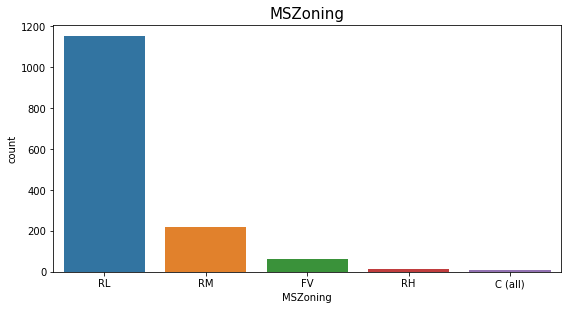

In [ ]:
#Barchart for categorical variable
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(x='MSZoning', data=df_pd2, order=df_pd['MSZoning'].value_counts().index)
plt.title('MSZoning', fontsize=15)
plt.show()

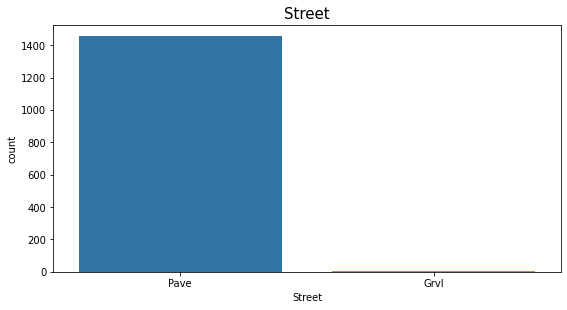

In [ ]:
#Barchart for categorical variable
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(x='Street', data=df_pd2, order=df_pd['Street'].value_counts().index)
plt.title('Street', fontsize=15)
plt.show()

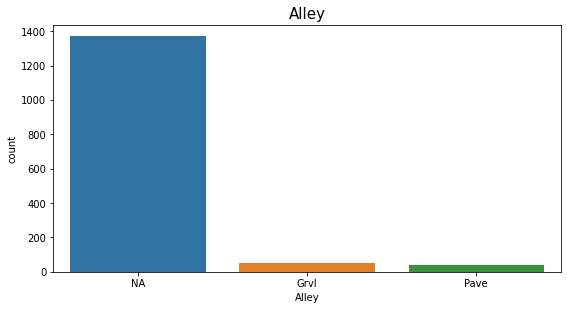

In [ ]:
#Barchart for categorical variable
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(x='Alley', data=df_pd2, order=df_pd['Alley'].value_counts().index)
plt.title('Alley', fontsize=15)
plt.show()

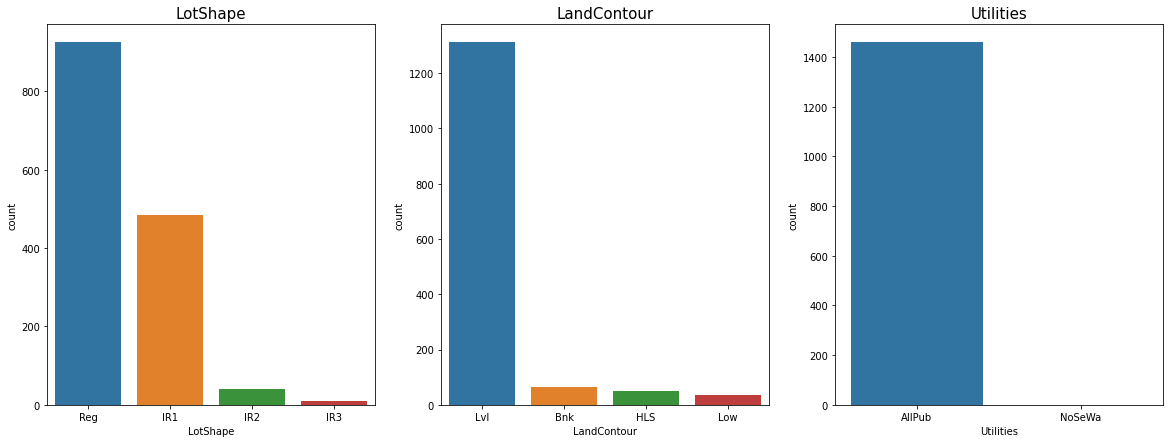

In [ ]:
#Barchart for categorical variable
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='LotShape', data=df_pd2, order=df_pd['LotShape'].value_counts().index)
plt.title('LotShape', fontsize=15)
plt.subplot(132)
sns.countplot(x='LandContour', data=df_pd2, order=df_pd['LandContour'].value_counts().index)
plt.title('LandContour', fontsize=15)
plt.subplot(133)
sns.countplot(x='Utilities', data=df_pd2, order=df_pd['Utilities'].value_counts().index)
plt.title('Utilities', fontsize=15)
plt.show()

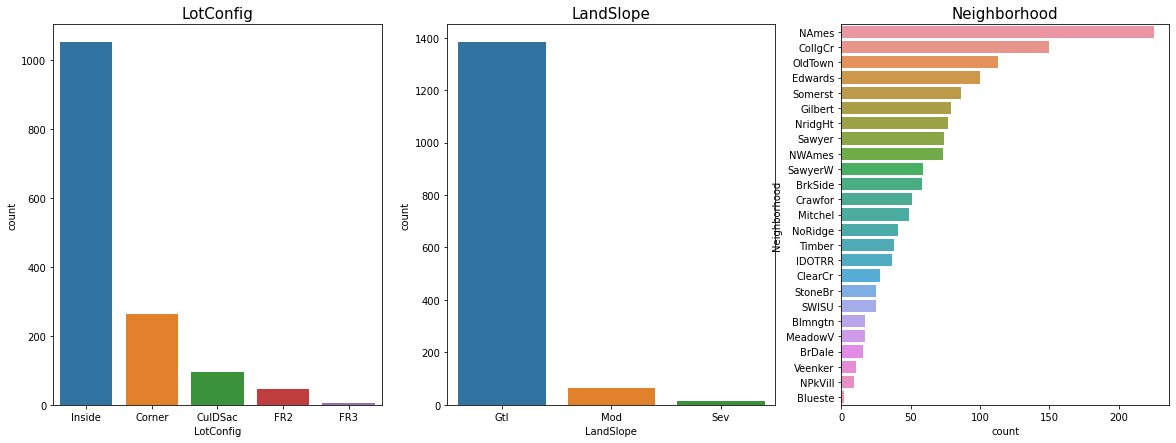

In [ ]:
#Barchart for categorical variable
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='LotConfig', data=df_pd2, order=df_pd['LotConfig'].value_counts().index)
plt.title('LotConfig', fontsize=15)
plt.subplot(132)
sns.countplot(x='LandSlope', data=df_pd2, order=df_pd['LandSlope'].value_counts().index)
plt.title('LandSlope', fontsize=15)
plt.subplot(133)
sns.countplot(y='Neighborhood', data=df_pd2, order=df_pd['Neighborhood'].value_counts().index)
plt.title('Neighborhood', fontsize=15)
plt.show()

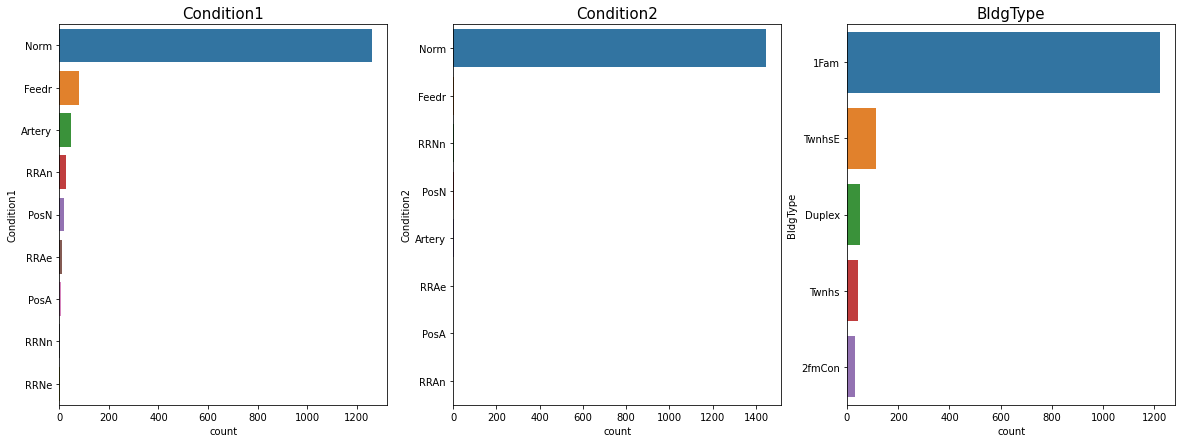

In [ ]:
#Barchart for categorical variable
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='Condition1', data=df_pd2, order=df_pd['Condition1'].value_counts().index)
plt.title('Condition1', fontsize=15)
plt.subplot(132)
sns.countplot(y='Condition2', data=df_pd2, order=df_pd['Condition2'].value_counts().index)
plt.title('Condition2', fontsize=15)
plt.subplot(133)
sns.countplot(y='BldgType', data=df_pd2, order=df_pd['BldgType'].value_counts().index)
plt.title('BldgType', fontsize=15)
plt.show()

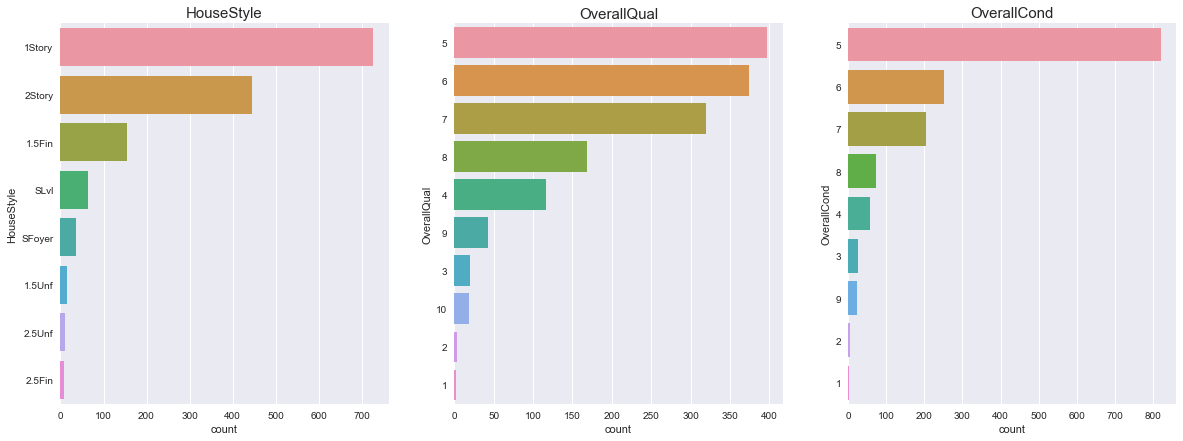

In [ ]:
#Barchart for categorical variable
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='HouseStyle', data=df_pd2, order=df_pd['HouseStyle'].value_counts().index)
plt.title('HouseStyle', fontsize=15)
plt.subplot(132)
sns.countplot(y='OverallQual', data=df_pd2, order=df_pd['OverallQual'].value_counts().index)
plt.title('OverallQual', fontsize=15)
plt.subplot(133)
sns.countplot(y='OverallCond', data=df_pd2, order=df_pd['OverallCond'].value_counts().index)
plt.title('OverallCond', fontsize=15)
plt.show()

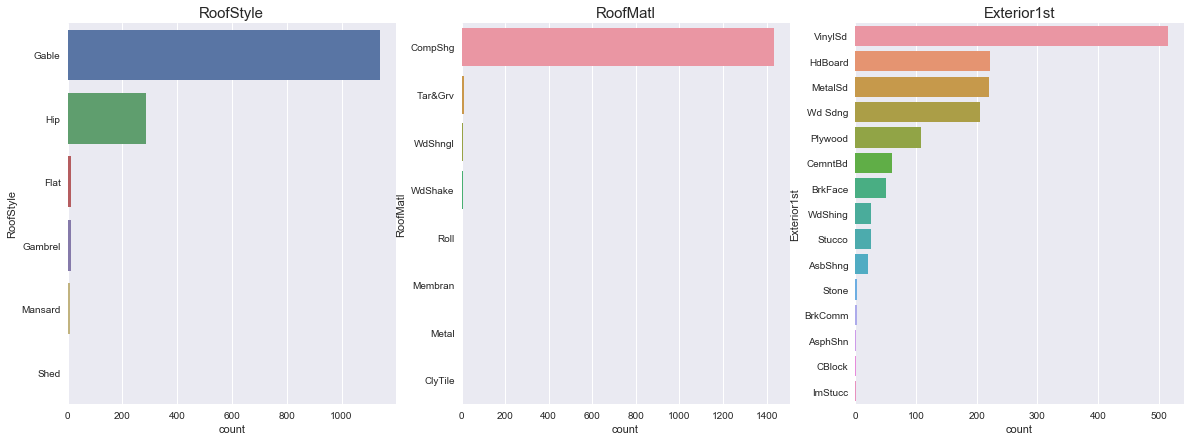

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='RoofStyle', data=df_pd2, order=df_pd['RoofStyle'].value_counts().index)
plt.title('RoofStyle', fontsize=15)
plt.subplot(132)
sns.countplot(y='RoofMatl', data=df_pd2, order=df_pd['RoofMatl'].value_counts().index)
plt.title('RoofMatl', fontsize=15)
plt.subplot(133)
sns.countplot(y='Exterior1st', data=df_pd2, order=df_pd['Exterior1st'].value_counts().index)
plt.title('Exterior1st', fontsize=15)
plt.show()

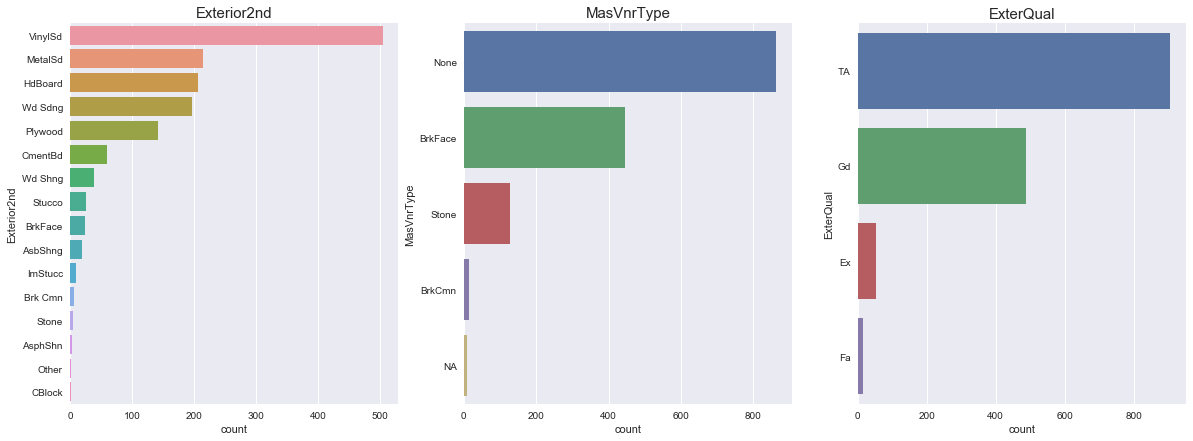

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='Exterior2nd', data=df_pd2, order=df_pd['Exterior2nd'].value_counts().index)
plt.title('Exterior2nd', fontsize=15)
plt.subplot(132)
sns.countplot(y='MasVnrType', data=df_pd2, order=df_pd['MasVnrType'].value_counts().index)
plt.title('MasVnrType', fontsize=15)
plt.subplot(133)
sns.countplot(y='ExterQual', data=df_pd2, order=df_pd['ExterQual'].value_counts().index)
plt.title('ExterQual', fontsize=15)
plt.show()

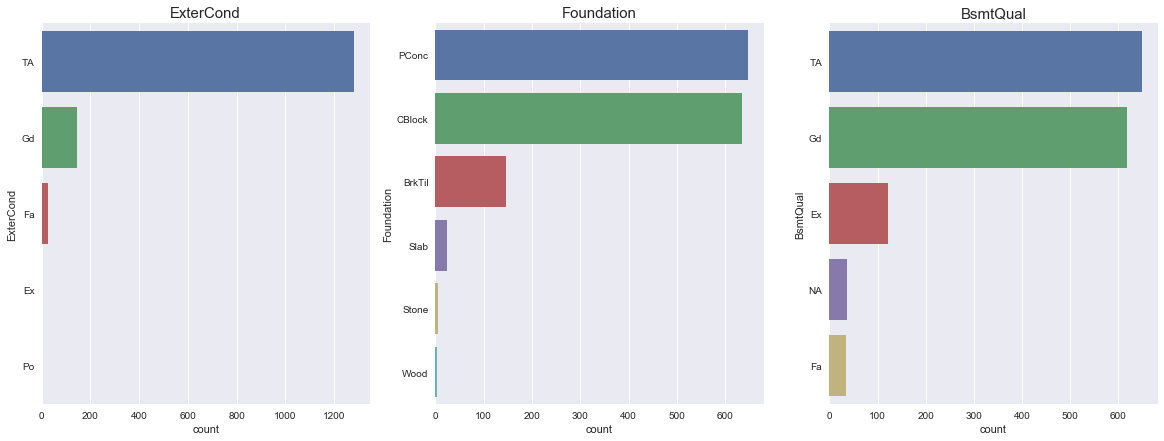

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='ExterCond', data=df_pd2, order=df_pd['ExterCond'].value_counts().index)
plt.title('ExterCond', fontsize=15)
plt.subplot(132)
sns.countplot(y='Foundation', data=df_pd2, order=df_pd['Foundation'].value_counts().index)
plt.title('Foundation', fontsize=15)
plt.subplot(133)
sns.countplot(y='BsmtQual', data=df_pd2, order=df_pd['BsmtQual'].value_counts().index)
plt.title('BsmtQual', fontsize=15)
plt.show()

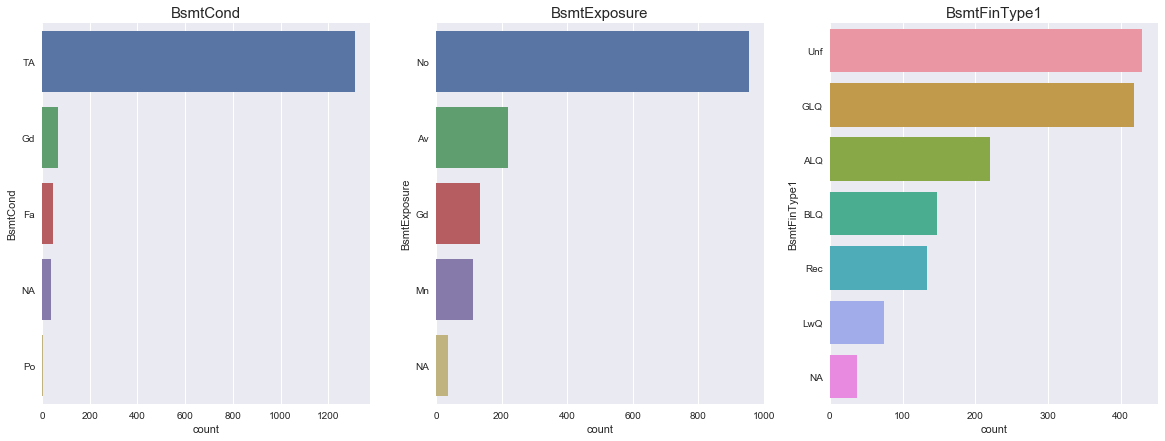

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='BsmtCond', data=df_pd2, order=df_pd['BsmtCond'].value_counts().index)
plt.title('BsmtCond', fontsize=15)
plt.subplot(132)
sns.countplot(y='BsmtExposure', data=df_pd2, order=df_pd['BsmtExposure'].value_counts().index)
plt.title('BsmtExposure', fontsize=15)
plt.subplot(133)
sns.countplot(y='BsmtFinType1', data=df_pd2, order=df_pd['BsmtFinType1'].value_counts().index)
plt.title('BsmtFinType1', fontsize=15)
plt.show()

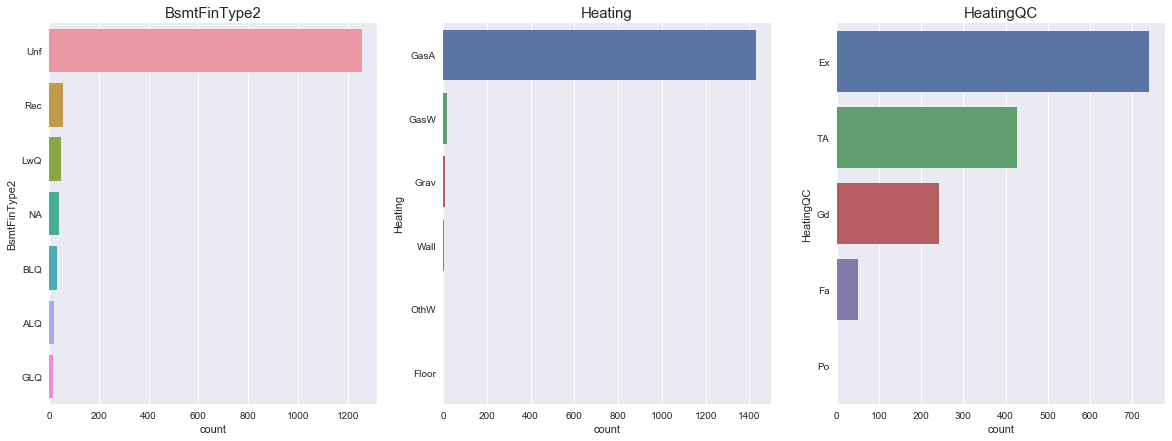

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='BsmtFinType2', data=df_pd2, order=df_pd['BsmtFinType2'].value_counts().index)
plt.title('BsmtFinType2', fontsize=15)
plt.subplot(132)
sns.countplot(y='Heating', data=df_pd2, order=df_pd['Heating'].value_counts().index)
plt.title('Heating', fontsize=15)
plt.subplot(133)
sns.countplot(y='HeatingQC', data=df_pd2, order=df_pd['HeatingQC'].value_counts().index)
plt.title('HeatingQC', fontsize=15)
plt.show()

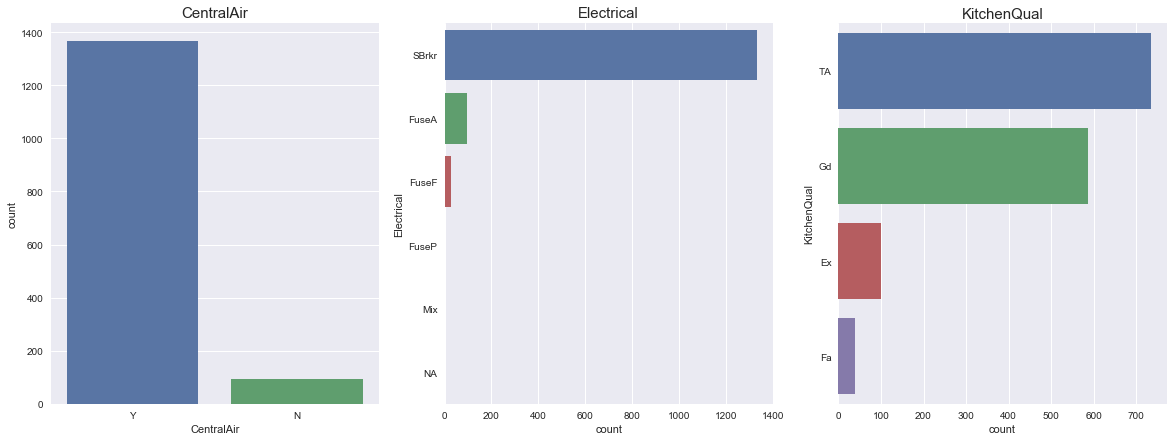

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='CentralAir', data=df_pd2, order=df_pd['CentralAir'].value_counts().index)
plt.title('CentralAir', fontsize=15)
plt.subplot(132)
sns.countplot(y='Electrical', data=df_pd2, order=df_pd['Electrical'].value_counts().index)
plt.title('Electrical', fontsize=15)
plt.subplot(133)
sns.countplot(y='KitchenQual', data=df_pd2, order=df_pd['KitchenQual'].value_counts().index)
plt.title('KitchenQual', fontsize=15)
plt.show()

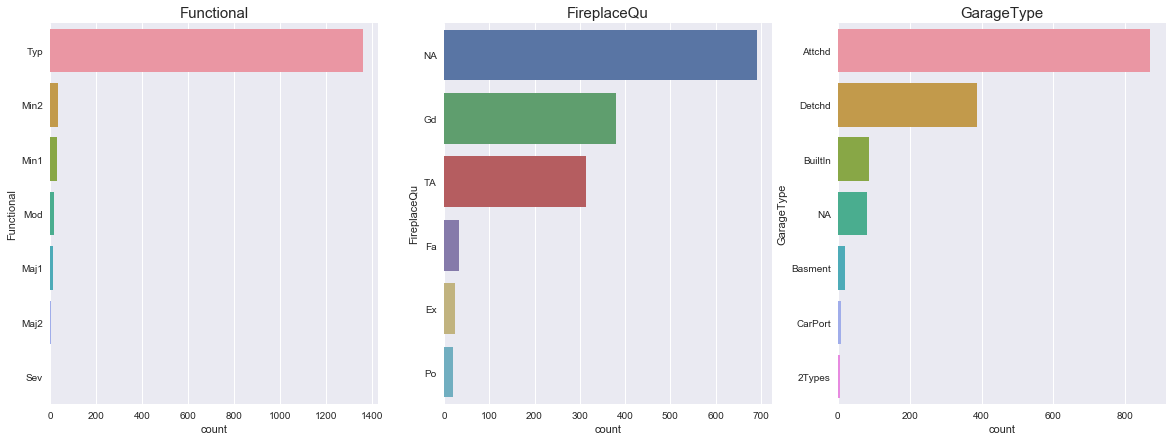

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='Functional', data=df_pd2, order=df_pd['Functional'].value_counts().index)
plt.title('Functional', fontsize=15)
plt.subplot(132)
sns.countplot(y='FireplaceQu', data=df_pd2, order=df_pd['FireplaceQu'].value_counts().index)
plt.title('FireplaceQu', fontsize=15)
plt.subplot(133)
sns.countplot(y='GarageType', data=df_pd2, order=df_pd['GarageType'].value_counts().index)
plt.title('GarageType', fontsize=15)
plt.show()

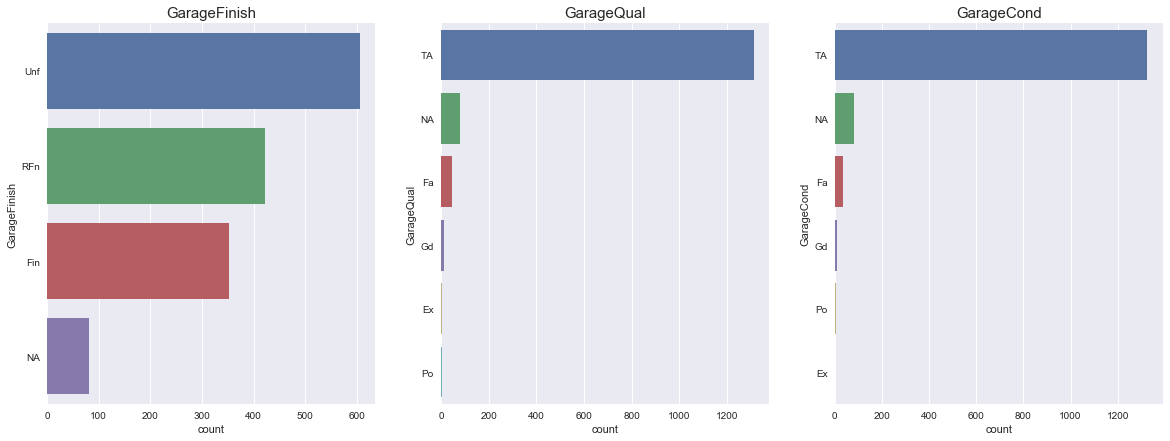

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='GarageFinish', data=df_pd2, order=df_pd['GarageFinish'].value_counts().index)
plt.title('GarageFinish', fontsize=15)
plt.subplot(132)
sns.countplot(y='GarageQual', data=df_pd2, order=df_pd['GarageQual'].value_counts().index)
plt.title('GarageQual', fontsize=15)
plt.subplot(133)
sns.countplot(y='GarageCond', data=df_pd2, order=df_pd['GarageCond'].value_counts().index)
plt.title('GarageCond', fontsize=15)
plt.show()

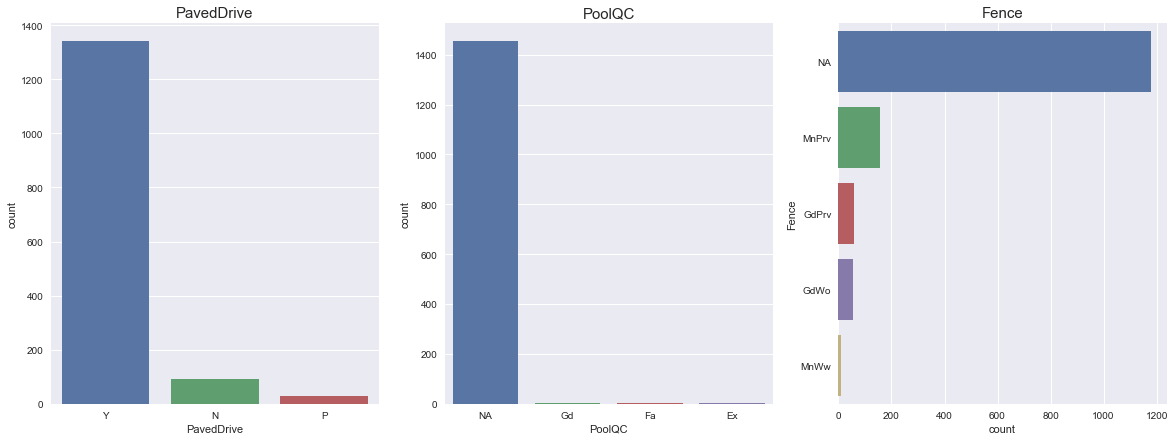

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='PavedDrive', data=df_pd2, order=df_pd['PavedDrive'].value_counts().index)
plt.title('PavedDrive', fontsize=15)
plt.subplot(132)
sns.countplot(x='PoolQC', data=df_pd2, order=df_pd['PoolQC'].value_counts().index)
plt.title('PoolQC', fontsize=15)
plt.subplot(133)
sns.countplot(y='Fence', data=df_pd2, order=df_pd['Fence'].value_counts().index)
plt.title('Fence', fontsize=15)
plt.show()

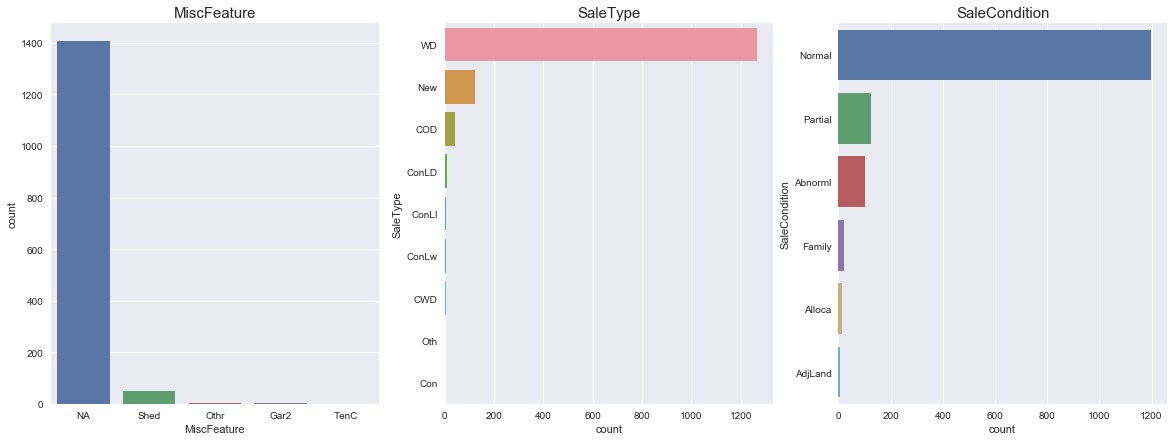

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='MiscFeature', data=df_pd2, order=df_pd['MiscFeature'].value_counts().index)
plt.title('MiscFeature', fontsize=15)
plt.subplot(132)
sns.countplot(y='SaleType', data=df_pd2, order=df_pd['SaleType'].value_counts().index)
plt.title('SaleType', fontsize=15)
plt.subplot(133)
sns.countplot(y='SaleCondition', data=df_pd2, order=df_pd['SaleCondition'].value_counts().index)
plt.title('SaleCondition', fontsize=15)
plt.show()

### Insignificant Categories in Dataset

From visualization above we can see, there are much categories with minimal number let's say under 7 from total observations 1460. Those minimal numbers of categories called insignificant categories and will replace with the largest numbers of catories in each categorical columns.


In [ ]:
threshold=97
threshold2=0.7

In [ ]:
def replace_cat2(f,cols):
    """input are dataframe and categorical variables, replace insignificant categories (percentage <=0.7) with largest number
    of catgories and output is new dataframe """
    df_percent=f.groupBy(cols).count().sort(col("count").desc())\
                .withColumn('total',sum(col('count')).over(window))\
                .withColumn('Percent',col('count')*100/col('total')) #calculate the percentage-save in Percent columns from each categories
    dominant_cat=df_percent.select(df_percent['Percent']).collect()[0][0] #calculate the highest percentage of category
    count_dist=f.select([cols]).distinct().count() #calculate distinct values in that columns
    if count_dist > 2 and dominant_cat <= threshold :
        print('column:', cols)
        cols_names.append(cols)  #combine with previous list
        replacement=f.groupBy(cols).count().sort(col("count").desc()).collect()[0][0] #define dominant category 
        print("replacement:",replacement)
        replacing.append(replacement) #combine with previous list
        insign_cat=df_percent.filter(df_percent['Percent']< threshold2).select(df_percent[cols]).collect() #calculate insignificant categories
        insign_cat=[r[cols] for r in insign_cat] #just take the values
        category.append(insign_cat) #combine with previous list
        print("insign_cat:",insign_cat)
        f=f.replace(insign_cat,replacement, cols) #replace insignificant categories with dominant categories
    return f

In [ ]:
df_percent=df_final.groupBy('Condition1').count().sort(col("count").desc())\
                    .withColumn('total',sum(col('count')).over(window))\
                    .withColumn('Percent',col('count')*100/col('total')) #calculate the percentage-save in Percent columns from each categories
df_percent.show()
#dominant_cat=df_percent.select(df_percent['Percent']).collect()[0][0]
#dominant_cat

+----------+-----+-----+------------------+
|Condition1|count|total|           Percent|
+----------+-----+-----+------------------+
|      Norm| 1260| 1460|  86.3013698630137|
|     Feedr|   81| 1460|5.5479452054794525|
|    Artery|   48| 1460| 3.287671232876712|
|      RRAn|   26| 1460|1.7808219178082192|
|      PosN|   19| 1460|1.3013698630136987|
|      RRAe|   11| 1460|0.7534246575342466|
|      PosA|    8| 1460| 0.547945205479452|
|      RRNn|    5| 1460|0.3424657534246575|
|      RRNe|    2| 1460| 0.136986301369863|
+----------+-----+-----+------------------+



In [ ]:
#eplacing insignificant categories 
replacing=[]
cols_names=[]
category=[]
for cols in cat_cols:
    df_final=replace_cat2(df_final,cols)

column: MSZoning
replacement: RL
insign_cat: ['C (all)']
column: Alley
replacement: NA
insign_cat: []
column: LotShape
replacement: Reg
insign_cat: ['IR3']
column: LandContour
replacement: Lvl
insign_cat: []
column: LotConfig
replacement: Inside
insign_cat: ['FR3']
column: LandSlope
replacement: Gtl
insign_cat: []
column: Neighborhood
replacement: NAmes
insign_cat: ['NPkVill', 'Blueste']
column: Condition1
replacement: Norm
insign_cat: ['PosA', 'RRNn', 'RRNe']
column: BldgType
replacement: 1Fam
insign_cat: []
column: HouseStyle
replacement: 1Story
insign_cat: ['2.5Fin']
column: OverallQual
replacement: 5
insign_cat: ['2', '1']
column: OverallCond
replacement: 5
insign_cat: ['2', '1']
column: RoofStyle
replacement: Gable
insign_cat: ['Mansard', 'Shed']
column: Exterior1st
replacement: VinylSd
insign_cat: ['Stone', 'BrkComm', 'AsphShn', 'ImStucc', 'CBlock']
column: Exterior2nd
replacement: VinylSd
insign_cat: ['ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock']
column: MasVnrTyp

In [ ]:
type(df_final)

pyspark.sql.dataframe.DataFrame

In [ ]:
#check length in list cols_names, category and replacing
len(cols_names), len(category), len(replacing)

(38, 38, 38)

From **replace_cat2** function above we got 3 list,  are:
1. list of columns, actually this list same with list categorical columns --> cols_names
2. list of replaced categories --> category
3. list of replacing categories --> replacing

Those three list will be created into dataframe called **g**.

In [ ]:
#Create dataframe of replaced categories
g=spark.createDataFrame(list(zip(cols_names, replacing, category)),['cols_names', 'replacing', 'category'])
g.show(9)

+------------+---------+------------------+
|  cols_names|replacing|          category|
+------------+---------+------------------+
|    MSZoning|       RL|         [C (all)]|
|       Alley|       NA|                []|
|    LotShape|      Reg|             [IR3]|
| LandContour|      Lvl|                []|
|   LotConfig|   Inside|             [FR3]|
|   LandSlope|      Gtl|                []|
|Neighborhood|    NAmes|[NPkVill, Blueste]|
|  Condition1|     Norm|[PosA, RRNn, RRNe]|
|    BldgType|     1Fam|                []|
+------------+---------+------------------+
only showing top 9 rows



In [ ]:
g.dtypes

[('cols_names', 'string'),
 ('replacing', 'string'),
 ('category', 'array<string>')]

In [ ]:
g.printSchema()

root
 |-- cols_names: string (nullable = true)
 |-- replacing: string (nullable = true)
 |-- category: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [ ]:
f_percent=df_final.groupBy('MSZoning').count().sort(col("count").desc())\
                       .withColumn('total',sum(col('count')).over(window))\
                       .withColumn('Percent',col('count')*100/col('total'))

In [ ]:
f_percent.show()

+--------+-----+-----+------------------+
|MSZoning|count|total|           Percent|
+--------+-----+-----+------------------+
|      RL| 1161| 1460| 79.52054794520548|
|      RM|  218| 1460|14.931506849315069|
|      FV|   65| 1460|4.4520547945205475|
|      RH|   16| 1460| 1.095890410958904|
+--------+-----+-----+------------------+



### Split Dataset into train and test

In [ ]:
# splitting into 75-25 training and test sets
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.util import MLUtils
from pyspark.mllib.evaluation import MulticlassMetrics

training, test = df_final.randomSplit([0.75, 0.25], seed=11)
training.cache()


DataFrame[Id: int, MSSubClass: int, MSZoning: string, LotFrontage: int, LotArea: int, Street: string, Alley: string, LotShape: string, LandContour: string, Utilities: string, LotConfig: string, LandSlope: string, Neighborhood: string, Condition1: string, Condition2: string, BldgType: string, HouseStyle: string, OverallQual: string, OverallCond: string, YearBuilt: int, YearRemodAdd: int, RoofStyle: string, RoofMatl: string, Exterior1st: string, Exterior2nd: string, MasVnrType: string, MasVnrArea: int, ExterQual: string, ExterCond: string, Foundation: string, BsmtQual: string, BsmtCond: string, BsmtExposure: string, BsmtFinType1: string, BsmtFinSF1: int, BsmtFinType2: string, BsmtFinSF2: int, BsmtUnfSF: int, TotalBsmtSF: int, Heating: string, HeatingQC: string, CentralAir: string, Electrical: string, 1stFlrSF: int, 2ndFlrSF: int, LowQualFinSF: int, GrLivArea: int, BsmtFullBath: int, BsmtHalfBath: int, FullBath: int, HalfBath: int, BedroomAbvGr: int, KitchenAbvGr: int, KitchenQual: string

In [ ]:
#logistic regression
from pyspark.ml.classification import LogisticRegression

#initialize the model
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol="cnt")

#fit the model
lrModel = lr_model.fit(v_train_df_org)

#generating predictions for testing model
pred=lrModel.transform(v_test_df)

pred.select("cnt","prediction").show(10)


### Modelling 
We will use four algorithm to make a model and prediction, they are:

1. Linear Regression
Linear regression used logit function in prediction the probability. 
2

### Evaluation
To evaluate model we use metrics, below:
1. RMSE (Root Mean Square Error)
 RMSE measures the differences between predicted values by the model and the actual values. RMSE can also state the size of the error generated by a prediction model.
2. R2 or R squared
 R-squared is a statistical measure of how close the data are to the fitted regression line.
 R-squared is always between 0 and 100%:

   - 0% indicates that the model explains none of the variability of the response data around its mean.
   - 100% indicates that the model explains all the variability of the response data around its mean.


### Modelling & Evaluation in Data train

#### Linear Regression

In [ ]:
#Create logistic regression model to data train
lr = LinearRegression(featuresCol='features', labelCol='label')

#fit model to data train
lr_model = lr.fit(df_final)

IllegalArgumentException: ignored

In [ ]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lr_model.coefficients))
print("Intercept: %s" % str(lr_model.intercept))

NameError: ignored

In [ ]:
#Summarize model over the data train and see the residual
trainingSummary = lr_model.summary
trainingSummary.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|  15256.66046846495|
| -37385.69734216272|
|-27647.176720130956|
|-2239.6602344769053|
| -3410.774663733784|
|  -7011.09891448589|
|  7509.266952410573|
|-11037.643065451877|
|-17067.605981558096|
| 3334.4243372266646|
| -924.3050105771981|
| 24883.377536825137|
| -557.7267156091984|
| -6086.000126113882|
|  5129.319041230716|
|-178.17293964046985|
|-31989.010358080966|
| -2420.508782338118|
|  1958.298614095198|
| 2825.7643796456978|
+-------------------+
only showing top 20 rows



In [ ]:
#calculate RMSE and R2 in training data
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 21178.857011
r2: 0.931966


In [ ]:
#Transform model to data test
lr_prediction= lr_model.transform(data_test)

In [ ]:
#view id, label, prediction and probability from result of modelling
lr_prediction.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
|206022.51514051552|208500|(222,[0,1,2,3,4,5...|
|   204392.37750819|181500|(222,[0,1,2,3,4,5...|
|158636.26291254023|140000|(222,[0,1,2,3,4,5...|
|173231.74339712667|143000|(222,[0,1,2,3,4,5...|
| 268923.8548053382|307000|(222,[0,1,2,3,4,5...|
+------------------+------+--------------------+
only showing top 5 rows



#### Linear Regression Evaluation

In [ ]:
#Calculate R squared
lr_evaluator=RegressionEvaluator(predictionCol='prediction', metricName='r2')
print("R squared (R2) on test data=%g" % lr_evaluator.evaluate(lr_prediction))

R squared (R2) on test data=0.813349


In [ ]:
#Calculate RMSE
lr_evaluator=RegressionEvaluator(predictionCol='prediction', metricName='rmse')
print("Root Mean Squared Error (RMSE) on linear regression model=%g" % lr_evaluator.evaluate(lr_prediction))

Root Mean Squared Error (RMSE) on linear regression model=32432.5


In [ ]:
#another way to calculate RMSE, and result is same with syntax above
test_result=lr_model.evaluate(data_test)
print("Root Mean Squared Error (RMSE) on linear regression model=%g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on linear regression model=32432.5


In [ ]:
test_result.residuals.show(6)

NameError: ignored